Load Data and Cleaning

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [3]:
netflix_movies = pd.read_csv ("netflix_movies.csv")

In [4]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Checking for sum of null values in the data set 

In [5]:
null_values_sum = netflix_movies.isnull().sum()

print (null_values_sum)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Checking the size of the dataset


In [6]:
row_count =len(netflix_movies) 

print("Number of rows :", row_count)

Number of rows : 8807


Checking for duplicates and removing them

In [7]:
def check_and_print_duplicates(df):
    duplicate_rows = df[df.duplicated(keep='first')]
    
    if not duplicate_rows.empty:
        print("Duplicate rows in the DataFrame:")
        print(duplicate_rows)
    else:
        print("No duplicate rows found in the DataFrame.")
df = pd.DataFrame(netflix_movies)

check_and_print_duplicates(netflix_movies)

No duplicate rows found in the DataFrame.


Drop null values

In [8]:
clean_netflix_movies = netflix_movies.dropna()

In [9]:
clean_null_values_sum = clean_netflix_movies.isnull().sum()

print (clean_null_values_sum)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [10]:
row_count =len(clean_netflix_movies) 

print("Number of rows :", row_count)

Number of rows : 5332


In [11]:
clean_netflix_movies.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Strip the white spaces 

In [12]:
Categorical_columns = ['type', 'title', 'director','cast','country', 'date_added','rating','listed_in','description']

clean_netflix_movies.loc[:, Categorical_columns] = clean_netflix_movies[Categorical_columns].map(lambda x: x.strip())

In [13]:
clean_netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


Exploratory Data Analysis

Descriptive statistics for release years:

In [14]:
#Perfom descriptive statistics for the release years
# Calculate the mean
mean_release_years = clean_netflix_movies['release_year'].mean()
print("Mean release years :", mean_release_years)

# Calculate the median
median_release_years = clean_netflix_movies['release_year'].median()
print("Median release years:", median_release_years)

# Calculate the mode
mode_release_years = clean_netflix_movies['release_year'].mode()
print("Mode release years:", mode_release_years)


Mean release years : 2012.7421230307577
Median release years: 2016.0
Mode release years: 0    2017
Name: release_year, dtype: int64


Descriptive statistics for genres:

In [15]:
# Count the frequency of each genre
genres_counts = clean_netflix_movies['listed_in'].str.split(', ', expand=True).stack().value_counts()


# Display overall genre statistics
print("\nGenre Statistics:")
# Calculate the mean
mean_genre_count = genres_counts.mean()
print("Mean genre count:", mean_genre_count)

# Calculate the median
median_genre_count = genres_counts.median()
print("Median genre count:", median_genre_count)

# Calculate the mode
mode_genre_count = genres_counts.mode()
print("Mode genre count:", mode_genre_count)





Genre Statistics:
Mean genre count: 282.3333333333333
Median genre count: 45.0
Mode genre count: 0    3
Name: count, dtype: int64


In [16]:
# Drop rows where 'duration' does not match min
clean_duration_netflix_movies = clean_netflix_movies[clean_netflix_movies['duration'].str.match(r'\d+ min')]

clean_duration_netflix_movies.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [17]:
print(clean_duration_netflix_movies['duration'].dtype)

object


In [18]:
# Strip 'min' and convert 'duration' to numeric
clean_duration_netflix_movies.loc[:, 'duration'] = pd.to_numeric(clean_duration_netflix_movies['duration'].str.replace(' min', ''))

In [19]:
# Perfom descriptive statistics for the duration of movies
# Calculate the mean
mean_duration = clean_duration_netflix_movies['duration'].mean()
print("Mean duration :", mean_duration)

# Calculate the median
median_duration = clean_duration_netflix_movies['duration'].median()
print("Median duration :",  median_duration)

# Calculate the mode
mode_duration = clean_duration_netflix_movies['duration'].mode()
print("Mode duration :",  mode_duration)

Mean duration : 102.70144648023144
Median duration : 101.0
Mode duration : 0    94
Name: duration, dtype: object


- Explore the relationship between release years and the number of movies/TV shows available.

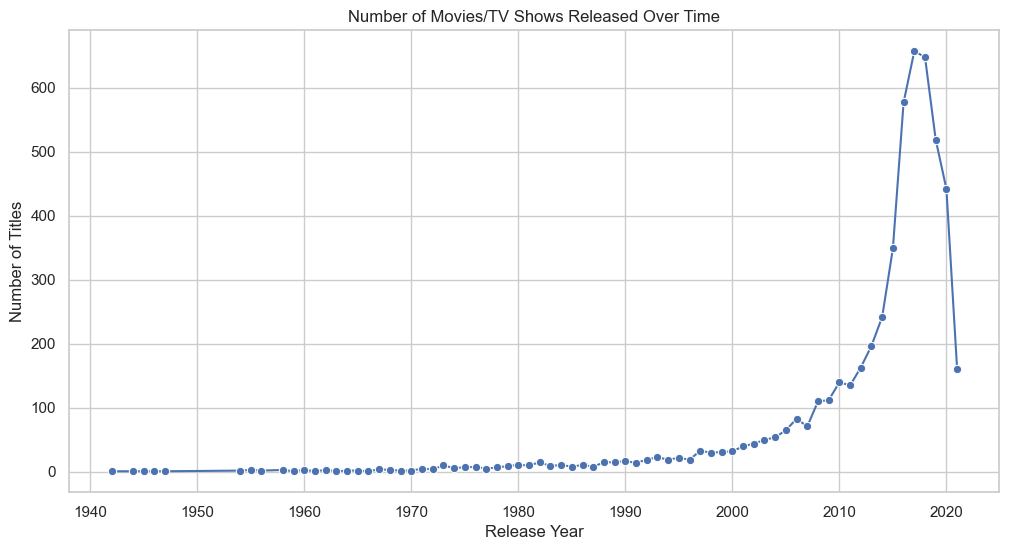

In [20]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Count the number of titles for each release year
titles_by_year = clean_netflix_movies['release_year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=np.array(titles_by_year.index), y=titles_by_year.values, marker='o', color='b')
plt.title('Number of Movies/TV Shows Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

 Visualize the _TOP 10 countries_ contributing to the Netflix content library using a bar plot or a world map.

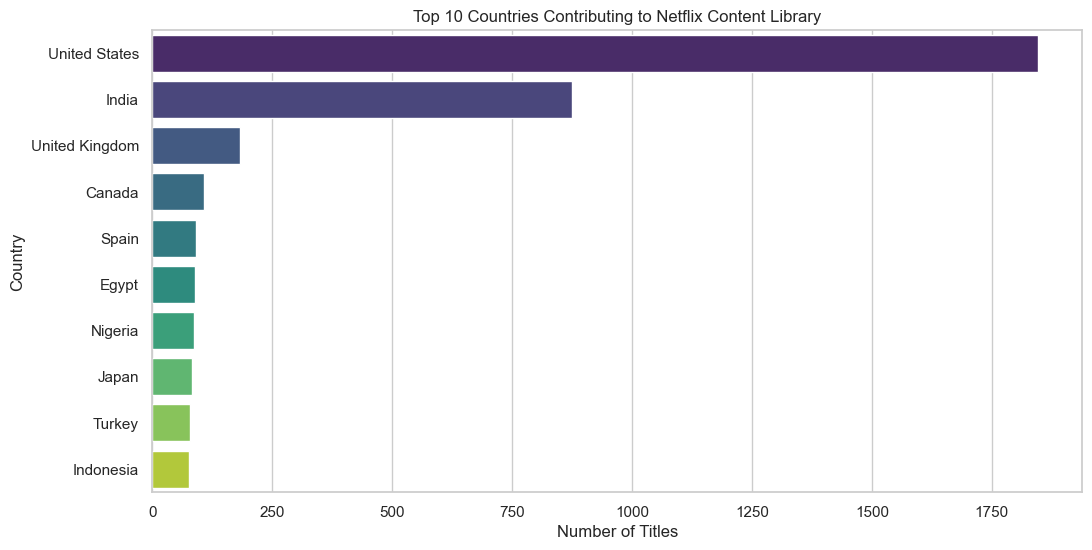

In [21]:
# Count the number of titles for each country
top_countries = clean_netflix_movies['country'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='viridis', dodge=False)
plt.title('Top 10 Countries Contributing to Netflix Content Library')
plt.xlabel('Number of Titles')
plt.ylabel('Country')

plt.show()

Create a `word cloud` of the most common words in movie titles or genres to identify popular themes or trends.

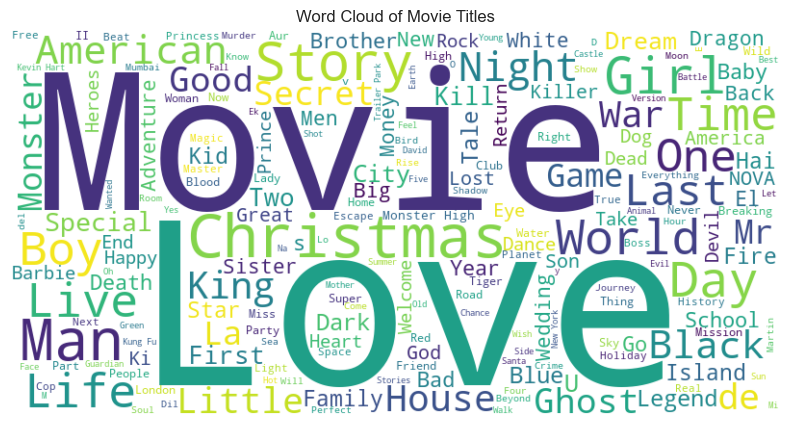

In [22]:
titles_text = ' '.join(clean_netflix_movies['title'])

# Create a WordCloud object using matplotlib
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

- Create visualizations to _analyze the distribution_ of content across different genres.

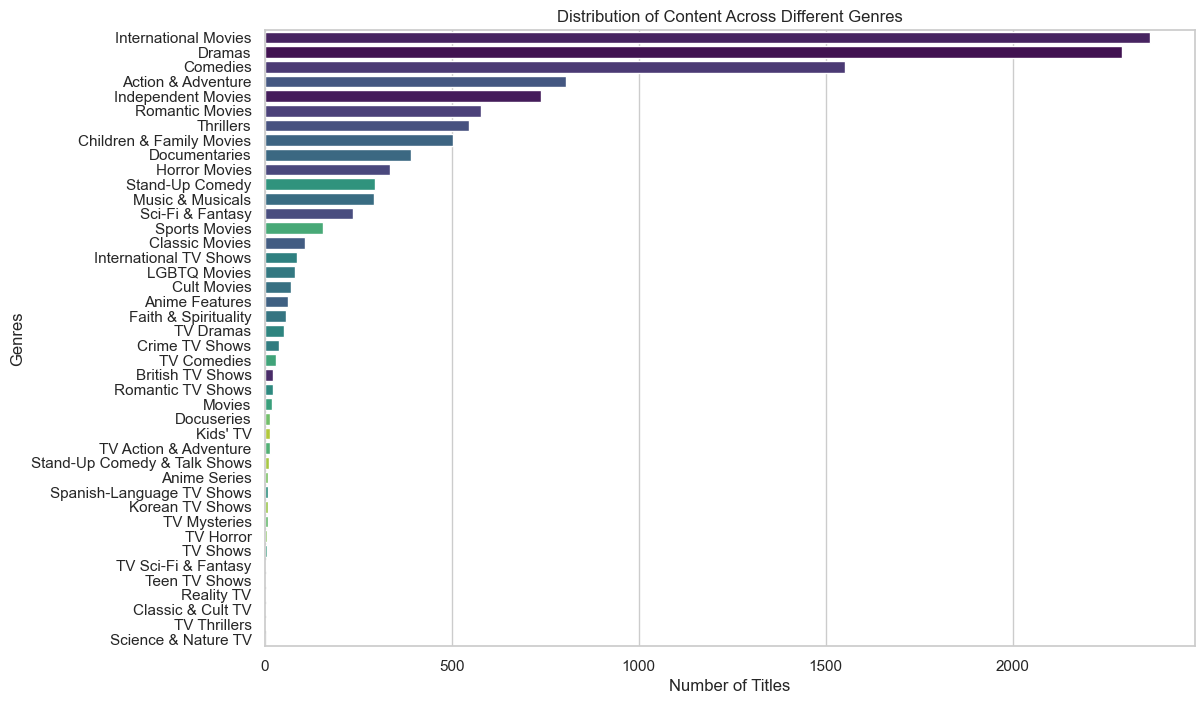

In [23]:
# Split the 'listed_in' column to get individual genres
genres = clean_netflix_movies['listed_in'].str.split(', ', expand=True).stack()

# Create a bar plot for the distribution of genres
plt.figure(figsize=(12, 8))
sns.countplot(y=genres, hue=genres, order=genres.value_counts().index, palette='viridis', dodge=False)
plt.title('Distribution of Content Across Different Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()